# Creamos el archivo de todos los binarios

In [1]:
import pandas as pd
df_1 = pd.read_csv("Positives_Refined.csv", sep=',')
df_1.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset', 'Interaccion']
df_2 = pd.read_csv("negatome_negatives_Refined.csv", sep=',')
df_2.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset', 'Interaccion']

df_pairs = pd.concat([df_1 , df_2], axis=0)


# Se revisa que no hayan duplicados

In [2]:
duplicate_interactions_binarias = df_1[df_1.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions_binarias.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions_binarias) 

No duplicate interactions found.


In [3]:
duplicate_interactions_binarias_2 = df_2[df_2.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions_binarias_2.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions_binarias_2) 

No duplicate interactions found.


In [4]:
duplicate_interactions_binarias_3 = df_pairs[df_pairs.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions_binarias_3.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions_binarias_3) 

#Como por si solos no hay repetidos, pero al unirlos si hay, se dropean todos, es decir, no se guarda ninguno.
df_positives = df_pairs.drop_duplicates(subset=['id_1','id_2'], keep=False)

duplicate_interactions_binarias_3['Duplicado positivo'] = True

#Se guardan los duplicados
duplicate_interactions_binarias_3.to_csv('Duplicated_Binary_Positives_and_Negatives.csv', index_label=False, index=False, encoding='utf-8')

#Se guardan los refinados
df_positives.to_csv('Binary_Positives_and_Negatives_Refined.csv', index_label=False, index=False, encoding='utf-8')

Duplicate interactions found:
        id_1                                              seq_1    id_2  \
12    O00401  GSNFQHIGHVGWDPNTGFDLNNLDPELKNLFDMCGISEAQLKDRET...  Q9UHR4   
13    O00512     NPDGLSQEQLEHRERSLQTLRDIQRMLFPDEKEFTGAQSGGPQQNP  Q9NQB0   
67    O14745            CLDFNISLAMAKERAHQKRSSKRAPQMDWSKKNELFSNL  P26038   
69    O14810  GPLGSKLPDAAKKFEEAQEALRQAEEERKAKYAKMEAEREAVRQGI...  P60880   
70    O14893  MRRAELAGLKTMAWVPAESAVEELMPRLLPVEPCDLTEGFDPSVPP...  P62304   
...      ...                                                ...     ...   
2184  Q96B26  DPMAAGFKTVEPLEYYRRFLKENCRPDGRELGEFRTTTVNIGSIST...  Q9NQT5   
2217  Q9NPD3  MADPMAGLELLSDQGYRVDGRRAGELRKIQARMGVFAQADGSAYIE...  Q9NQT4   
2218  Q9NPD3  MADPMAGLELLSDQGYRVDGRRAGELRKIQARMGVFAQADGSAYIE...  Q9NQT5   
2219  Q9NPD3  MADPMAGLELLSDQGYRVDGRRAGELRKIQARMGVFAQADGSAYIE...  Q9Y3B2   
2233  O15234  PQRSVEGWILFVTGVHEEATEEDIHDKFAEYGEIKNIHLNLDRRTG...  Q9Y5S9   

                                                  seq_2   dataset  In

C:\Users\julia\AppData\Local\Temp\ipykernel_9304\303430205.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_interactions_binarias_3['Duplicado positivo'] = True


In [8]:
df_N1 = df_positives.filter(['id_1','seq_1'], axis=1)
df_N1.columns = ['id_seq','seq']

df_N2 = df_positives.filter(['id_2','seq_2'], axis=1)
df_N2.columns = ['id_seq','seq']

#concatenar
df_all_seq = pd.concat([df_N1, df_N2])

df_unique_seq = df_all_seq.drop_duplicates(subset=['seq'],ignore_index=True)
df_unique_seq.info()

df_unique_seq.to_csv('unique_seq_binary.csv', index_label=False, index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920 entries, 0 to 42919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  42920 non-null  object
 1   seq     42920 non-null  object
dtypes: object(2)
memory usage: 670.8+ KB


# Revisamos si hay alguna interacción binaria en PDBind, Skempi o Proximate

## PDBbind

In [8]:
PDBbind = pd.read_csv("PDBbind_filtered.csv", sep=',')
PDBbind.columns = ['pdb complex','Kd [M]','protein_1_seq', 'protein_2_seq']

#Se filtan los duplicados del mismo set de datos
dd =PDBbind[PDBbind.duplicated(subset=['protein_1_seq', 'protein_2_seq'])]

if dd.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    
#Se dropean los duplicados del mismo set de datos y se guarda el refinado
df_PDBbind_filt = PDBbind.drop_duplicates(subset=['protein_1_seq','protein_2_seq'])
df_PDBbind_filt.to_csv('PDBbind_refined.csv', index_label=False, index=False, encoding='utf-8')
    
#Se trabaja en un nuevo dataframe
df_PDBbind = pd.DataFrame()
df_PDBbind['seq_1'] = df_PDBbind_filt['protein_1_seq']
df_PDBbind['seq_2'] = df_PDBbind_filt['protein_2_seq']

df_positivos = pd.DataFrame()
df_positivos['seq_1'] = df_positives['seq_1']
df_positivos['seq_2'] = df_positives['seq_2']

df_bind = pd.concat([df_positivos, df_PDBbind], axis=0)

duplicate_int = df_bind[df_bind.duplicated(subset=['seq_1', 'seq_2'])]

if duplicate_int.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_int)


No duplicate interactions found.
Duplicate interactions found:
                                                  seq_1  \
407   MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...   
438   MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...   
592   MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
1034  MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
1035  MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
...                                                 ...   
1     MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...   
2008  DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...   
2056  MTATLRPYLSAVRATLQAALCLENFSSQVVERHNKPEVEVRSSKEL...   
28    MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...   
677   MGLLGILCFLIFLGKTWGQEQTYVISAPKIFRVGASENIVIQVYGY...   

                                                  seq_2  
407   MAAIRKKLVVVGDGACGKTCLLIVFSKDEFPEVYVPTVFENYVADI...  
438   MAQNLKDLAGRLPAGPRGMGTALKLLLGAGAVAYGVRESVFTVEGG...  
592   MNNQKQQKPTLSGQRFKTRKRDEKERFDPTQFQDCIIQGLTETGTD..

In [9]:
columnas_seleccionadas = ['seq_1', 'seq_2']
resultado = df_positives[columnas_seleccionadas].isin(duplicate_int)
filas_con_valores = df_positives[resultado.any(axis=1)]

#Para poner donde se repite
filas_con_valores['Repetido'] = 'PDBbind'
filas_con_valores.to_csv('Repetidos_binarios_PDBbind.csv', index_label=False, index=False, encoding='utf-8')

C:\Users\julia\AppData\Local\Temp\ipykernel_17460\2501871374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_con_valores['Repetido'] = 'PDBbind'


## Skempi

In [10]:
Skempi = pd.read_csv("skempi_final.csv", sep=',')
Skempi.columns = ['index','pdb complex','chain 1', 'chain 2', 'Affinity_wt (M)', 'Protein 1','Protein 2','protein_1_seq','protein_2_seq']

df_Skempi = pd.DataFrame()
df_Skempi['seq_1'] = Skempi['protein_1_seq']
df_Skempi['seq_2'] = Skempi['protein_2_seq']

#Se filtan los duplicados del mismo set de datos
duplicate_skempi = Skempi[Skempi.duplicated(subset=['protein_1_seq', 'protein_2_seq'])]

if duplicate_skempi.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")

duplicate_skempi.to_csv('Duplicated_skempi.csv', index_label=False, index=False, encoding='utf-8')

#Se dropean los duplicados del mismo set de datos y se guarda el refinado

df_Skempi_filt = df_Skempi.drop_duplicates(subset=['seq_1','seq_2'])
df_Skempi_filt.to_csv('Skempi_refined.csv', index_label=False, index=False, encoding='utf-8')

#Se trabaja en un nuevo dataframe
df_skempi_unido = pd.concat([df_positivos, df_Skempi_filt], axis=0)
duplicate = df_skempi_unido[df_skempi_unido.duplicated(subset=['seq_1', 'seq_2'])]

if duplicate.empty:
   print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate)

Duplicate interactions found:
Duplicate interactions found:
                                                    seq_1  \
407     MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...   
438     MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...   
592     MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
1034    MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
1035    MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...   
...                                                   ...   
847289  MAFTNYSSLNRAQLTFEYLHTNSTTHEFLFGALAELVDNARDADAT...   
1       MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...   
2008    DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...   
2056    MTATLRPYLSAVRATLQAALCLENFSSQVVERHNKPEVEVRSSKEL...   
14      RSSNELHQVPSNCDCLNGGTCVSNKYFSNIHWCNCPKKFGGQHCEI...   

                                                    seq_2  
407     MAAIRKKLVVVGDGACGKTCLLIVFSKDEFPEVYVPTVFENYVADI...  
438     MAQNLKDLAGRLPAGPRGMGTALKLLLGAGAVAYGVRESVFTVEGG...  
592     MNNQKQQKPTLSGQRFKTR

In [11]:
columnas_seleccionadas = ['seq_1', 'seq_2']
resultado_skempi = df_positives[columnas_seleccionadas].isin(duplicate)
filas_con_valores_skempi = df_positives[resultado_skempi.any(axis=1)]

#Para poner donde se repite
filas_con_valores_skempi['Repetido'] = 'Skempi'
filas_con_valores_skempi.to_csv('Repetidos_binarios_Skempi.csv', index_label=False, index=False, encoding='utf-8')


C:\Users\julia\AppData\Local\Temp\ipykernel_17460\4121356240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_con_valores_skempi['Repetido'] = 'Skempi'


## Proximate

In [12]:
Proximate = pd.read_csv("proximate_WT_final.csv", sep=',')
Proximate.columns = ['index','PDB','Wild-type KD (M)','protein_1_seq','protein_2_seq']

#Se filtan los duplicados del mismo set de datos
duplicate_Proximate = Proximate[Proximate.duplicated(subset=['protein_1_seq', 'protein_2_seq'])]

if duplicate_Proximate.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")

duplicate_Proximate.to_csv('Duplicated_Proximate.csv', index_label=False, index=False, encoding='utf-8')

#Se dropean los duplicados del mismo set de datos y se guarda el refinado
df_Proximate_filt = Proximate.drop_duplicates(subset=['protein_1_seq','protein_2_seq'])
df_Proximate_filt.to_csv('Proximate_refined.csv', index_label=False, index=False, encoding='utf-8')
    
#Se trabaja como dataframe nuevo
df_Proximate = pd.DataFrame()
df_Proximate['seq_1'] = df_Proximate_filt['protein_1_seq']
df_Proximate['seq_2'] = df_Proximate_filt['protein_2_seq']

#Se concatenan
df_Proximate_unido = pd.concat([df_positivos, df_Proximate], axis=0)

#Se conocen los duplicados 
Proximate_duplicate = df_Proximate_unido[df_Proximate_unido.duplicated(subset=['seq_1', 'seq_2'])]

if Proximate_duplicate.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    
#Se extraen los duplicados
columnas_seleccionadas = ['seq_1', 'seq_2']
resultado_Proximate = df_positives[columnas_seleccionadas].isin(Proximate_duplicate)
filas_con_valores_Proximate = df_positives[resultado_Proximate.any(axis=1)]

#Para poner donde se repite
filas_con_valores_Proximate['Repetido'] = 'Proximate'
filas_con_valores_Proximate.to_csv('Repetidos_binarios_Proximate.csv', index_label=False, index=False, encoding='utf-8')

Duplicate interactions found:
Duplicate interactions found:


C:\Users\julia\AppData\Local\Temp\ipykernel_17460\1743759654.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_con_valores_Proximate['Repetido'] = 'Proximate'


# Ver repetidos entre ellos

In [13]:
a_PDB = pd.read_csv("Repetidos_binarios_PDBbind.csv", sep=',')
a_PDB.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset', 'Interaccion', 'Repetido']
b_Proximate = pd.read_csv("Repetidos_binarios_Proximate.csv", sep=',')
b_Proximate.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset', 'Interaccion', 'Repetido']
c_Skempi = pd.read_csv("Repetidos_binarios_Skempi.csv", sep=',')
c_Skempi.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset', 'Interaccion', 'Repetido']
d_unido = pd.concat([a_PDB, b_Proximate,c_Skempi], axis=0)

In [14]:
d_dupl = d_unido[d_unido.duplicated(subset=['id_1', 'id_2'])]

if d_dupl.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(d_dupl) 

d_dupl.to_csv('Repetidos_Proximate_Skempi_PDBbind.csv', index_label=False, index=False, encoding='utf-8')

drop_dupl = d_unido.drop_duplicates(subset=['id_1', 'id_2'])
drop_dupl.to_csv('Proximate_Skempi_PDBbind_refined.csv', index_label=False, index=False, encoding='utf-8')

Duplicate interactions found:
            id_1                                              seq_1      id_2  \
0     A0A0F6B1Q8  MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...    P62746   
1     A0A0F6B1Q8  MPLSVGQGYFTSSISSEKFNAIKESARLPELSLWEKIKAYFFTTHH...    Q99623   
2     A0A0F6B5H5  MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...    Q9CQC6   
3     A0A0H3NF08  MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...    P05023   
4     A0A0H3NF08  MERSLDSLAGMAKSAFGAGTSAAMRQATSPKTILEYIINFFTCGGI...    P05556   
...          ...                                                ...       ...   
1168      Q9WTX5  MPTIKLQSSDGEIFEVDVEIAKQSVTIKTMLEDLGMDDEGDDDPVP...    Q9WTX6   
1169    Q9Y6X9-1  MAFTNYSSLNRAQLTFEYLHTNSTTHEFLFGALAELVDNARDADAT...  Q9Y6X9-1   
1170      A7MB62  MDSQGRKVVVCDNGTGFVKCGYAGSNFPEHIFPALVGRPIIRSTTK...    Q3T035   
1171      P02605  DEDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVMVG...    P68135   
1172      Q148J6  MTATLRPYLSAVRATLQAALCLENFSSQVVERHNKPEVEVRSSKEL...    Q3T035  

## Para ver los Canonicos y eleminar los no canonicos

In [78]:
import pandas as pd
#Ahora veamos el largo del dataframe
seq_neg = pd.read_csv("unique_seq_binary.csv", sep=',')

# Canonical amino acids (single-letter codes)
canonical_amino_acids = set('ACDEFGHIKLMNPQRSTVWY')

def has_noncanonical(sequence):
    """
    Checks if a protein sequence contains non-canonical amino acids.
    Returns True if non-canonical amino acids are found, False otherwise.
    """
    return any(aa not in canonical_amino_acids for aa in sequence)

# Apply the has_noncanonical function to the 'Sequence' column
seq_neg['Has_Noncanonical'] = seq_neg['seq'].apply(has_noncanonical)

canonical_df = seq_neg.loc[~seq_neg['Has_Noncanonical']]

canonical_df.to_csv('Binary_without_canonical_aa.csv', index_label=False, index=False, encoding='utf-8')

# Filtrar por largos

In [79]:
seq_biny_CC = pd.read_csv("Binary_without_canonical_aa.csv", sep=',')
Large = []
for i in range(0,(len(seq_biny_CC))):
    if len(seq_biny_CC.iloc[i,1]) <= 1024:
        Large.append(len(seq_biny_CC.iloc[i,1]))
    else:
        None
    
large_tot = pd.DataFrame(Large)
large_tot.describe()

,0
count,37351.000000
mean,434.150545
std,232.798716
min,5.000000
25%,249.000000
50%,398.000000
75%,586.000000
max,1024.000000


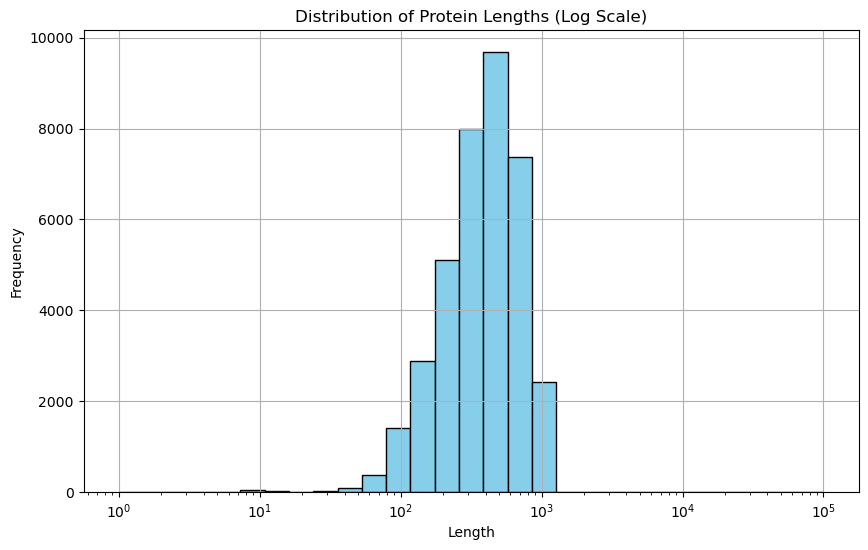

In [74]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.hist(Large, bins=np.logspace(0, 5, 30), color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths (Log Scale)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('gauss.png')
plt.show()